In [1]:
# Here we want to visualiza our neural data
# we want to create a beautiful plots for publish ready

In [2]:
%load_ext autoreload
%autoreload 2

# Imports

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from clean_functions import load_neural_data, make_a_plot_beautiful, transpose_neural_data, select_contents, generate_times

# Load neural Data

In [9]:
# Load neural data
neural_data_path = "mag_wm_data.mat"
contents = [f"r{i}" for i in range(1, 7)]

neural_data = load_neural_data(file_path=neural_data_path, contents=contents)
# it will take 4s to load the neural data

In [11]:
# Get stats for our neural data

for key, value in neural_data.items():
    print(f"{key}")
    print(f"\t{value.mean()}")
    print(f"\t{value.std()}")
    print(f"\t{value.min()}")
    print(f"\t{value.max()}")

r1
	0.0032395863400919286
	0.1576788331567779
	-0.28985582032346807
	3.821125877675539
r2
	-0.0014614441534778256
	0.15676936809148603
	-0.28985582032346807
	3.9784140265332932
r3
	-0.0061656802699063635
	0.15258091450485756
	-0.28985582032346807
	3.188725073369968
r4
	0.005187397447318521
	0.15073336805059473
	-0.30548559481914245
	3.8288742863923435
r5
	0.0069516938387696355
	0.15172891144474526
	-0.30548559481914245
	3.255337183434833
r6
	0.00826448365890365
	0.15185616359429652
	-0.30548559481914245
	2.5993699848864185


# preprocess neural data

In [23]:
# first transpose neural data
neural_data = transpose_neural_data(neural_data)

for key, value in neural_data.items():
    print(f"{key}: {value.shape}")

r1: (16, 200, 192, 41)
r2: (16, 200, 192, 41)
r3: (16, 200, 192, 41)
r4: (16, 200, 192, 41)
r5: (16, 200, 192, 41)
r6: (16, 200, 192, 41)


# Plot neural data

## single neuron response

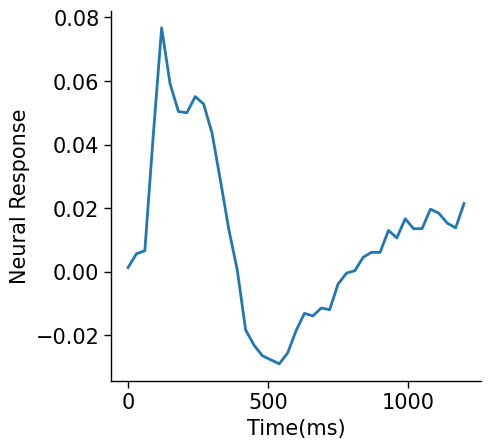

In [55]:
delay = 400
task = "active"
content = select_contents(delay=delay, task=task)
times = generate_times(0, 1200, 30)
neural_res = neural_data[content]

# first take an average over reps and images
neural_res = np.nanmean(neural_res, axis=(0, 1)) # reps, images

# make a plot of single neuron
fig, ax = plt.subplots()
ax.plot(times, neural_res[0], linewidth=2)
make_a_plot_beautiful(ax)
    
plt.xlabel("Time(ms)")
plt.ylabel("Neural Response")
# plt.title("Single Neuron Response delay 400ms")

plt.show()

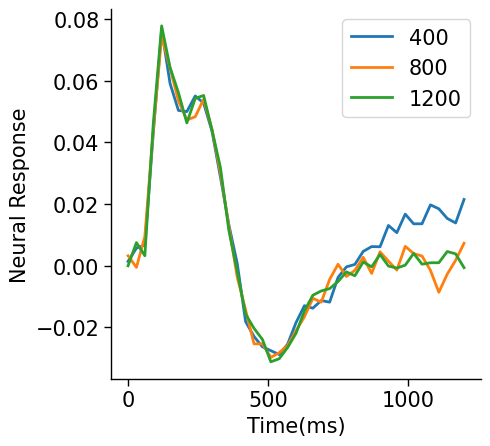

In [59]:
# Let's plot for all delays

task = "active"
times = generate_times(0, 1200, 30)
fig, ax = plt.subplots()

for delay in [400, 800, 1200]:
    content = select_contents(delay=delay, task=task)
    neural_res = neural_data[content]
    
    # first take an average over reps and images
    neural_res = np.nanmean(neural_res, axis=(0, 1)) # reps, images
    ax.plot(times, neural_res[0], linewidth=2, label=f"{delay}")

make_a_plot_beautiful(ax)
    
plt.xlabel("Time(ms)")
plt.ylabel("Neural Response")
plt.legend()
# plt.title("Single Neuron Response delay 400ms")

plt.show()

## Taking average over all populations

### 📌 Standard Deviation vs. Standard Error

#### 🔹 Standard Deviation (SD)
- Measures **spread** of data points around the mean.
- Formula:
  \[
  s = \sqrt{\frac{\sum (x_i - \bar{x})^2}{n-1}}
  \]
- **Use:** Shows variability in the dataset.

#### 🔹 Standard Error (SE)
- Measures **accuracy** of the sample mean in estimating the population mean.
- Formula:
  \[
  SE = \frac{s}{\sqrt{n}}
  \]
- **Use:** Shows how precisely the sample mean represents the population.

---

#### 🔹 Sample vs. Population Standard Deviation
| Metric  | Population SD \( \sigma \) | Sample SD \( s \) |
|---------|------------------|------------------|
| Formula | \( \sqrt{\frac{\sum (x_i - \mu)^2}{N}} \) | \( \sqrt{\frac{\sum (x_i - \bar{x})^2}{n-1}} \) |
| Denominator | \( N \) | \( n-1 \) (Bessel’s correction) |
| Use | Whole population | Sample from population |

---

#### 🔹 Why Use \( n-1 \)? (Bessel’s Correction)
- **A sample underestimates true population variability.**
- Dividing by \( n-1 \) **corrects for bias**.
- Makes the estimate **closer to the true population SD**.

---

#### 🔹 How to Calculate in NumPy
```python
import numpy as np

data = np.array([10, 12, 23, 23, 16, 23, 21, 16, 18, 19])

# Sample Standard Deviation
std_dev = np.std(data, ddof=1)  # ddof=1 for sample SD
print("Sample Standard Deviation:", std_dev)

# Standard Error
std_error = std_dev / np.sqrt(len(data))
print("Standard Error:", std_error)


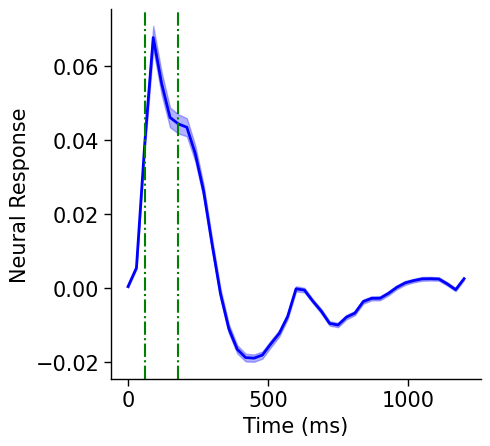

In [56]:
times = generate_times(0, 1200, 30)
delay = 400
task = "active"
content = select_contents(delay=delay, task=task)
times = generate_times(0, 1200, 30)
neural_res = neural_data[content]

# first take an average over reps and images
neural_res = np.nanmean(neural_res, axis=(0, 1)) # reps, images

mean_neural_res = np.nanmean(neural_res, axis=0) # Over all electrodes

sd_neural_res = np.nanstd(neural_res, axis=0, ddof=1) # estimating sample standard deviation
se_neural_res = sd_neural_res / np.sqrt(len(neural_res))

fig, ax = plt.subplots()
# Plot mean response
ax.plot(times, mean_neural_res, linewidth=2, label="Mean Neural Population Activity", color="blue")

# Add SE as a shaded region
ax.fill_between(times, mean_neural_res - se_neural_res, mean_neural_res + se_neural_res,
                color="blue", alpha=0.3, label="Standard Error")


# Add vertical dashed lines at 60ms and 180ms
ax.axvline(x=60, linestyle="-.", color="green", linewidth=1.5, label="Event at 60ms")
ax.axvline(x=180, linestyle="-.", color="green", linewidth=1.5, label="Event at 180ms")

make_a_plot_beautiful(ax)

# Labels and legend
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Neural Response")
# ax.legend()
# ax.grid(True)

plt.show()


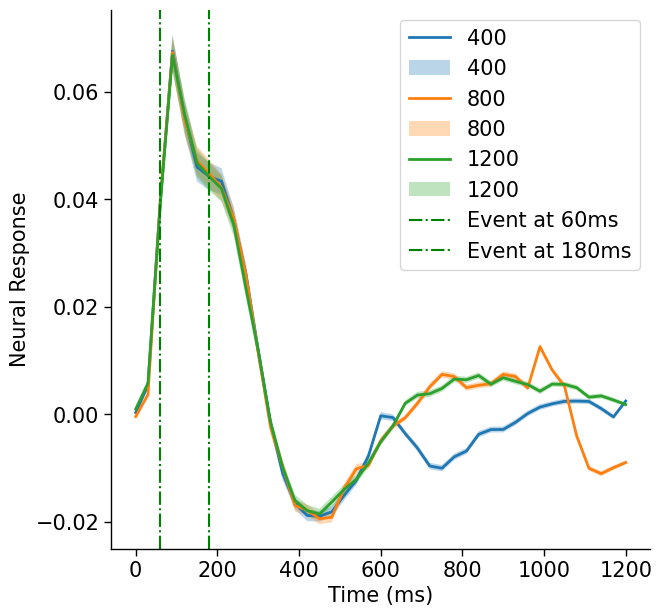

In [67]:
def calculate_mean_and_se(neural_res):
    # this function will take an 2d neural response
    # we should use this function when we took an average from reps and images

    if np.ndim(neural_res) != 2:
        raise "Please first take an average over reps and images"

    mean = np.nanmean(neural_res, axis=0) # Over all electrodes # shape: (41,)

    sd = np.nanstd(neural_res, axis=0, ddof=1) # estimating sample standard deviation # shape: (41,)
    se = sd_neural_res / np.sqrt(len(neural_res)) # shape: (41,)

    return mean, se


times = generate_times(0, 1200, 30)
task = "active"
fig, ax = plt.subplots(figsize=(7, 7))

for delay in [400, 800, 1200]:
    content = select_contents(delay=delay, task=task)
    neural_res = neural_data[content]
    # first take an average over reps and images
    neural_res = np.nanmean(neural_res, axis=(0, 1)) # reps, images

    mean, se = calculate_mean_and_se(neural_res)
    # Plot mean response
    ax.plot(times, mean, linewidth=2, label=f"{delay}")
    
    # Add SE as a shaded region
    ax.fill_between(times, mean - se, mean + se, alpha=0.3, label=f"{delay}")

# Add vertical dashed lines at 60ms and 180ms
ax.axvline(x=60, linestyle="-.", color="green", linewidth=1.5, label="Event at 60ms")
ax.axvline(x=180, linestyle="-.", color="green", linewidth=1.5, label="Event at 180ms")

make_a_plot_beautiful(ax)

# Labels and legend
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Neural Response")
ax.legend()
# ax.grid(True)

plt.show()

## Taking average over only first 96 sites (pit)

## Taking average over only first 96 sites (ait)